In [30]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties.unumpy as unp
from uncertainties import ufloat
from scipy.optimize import curve_fit

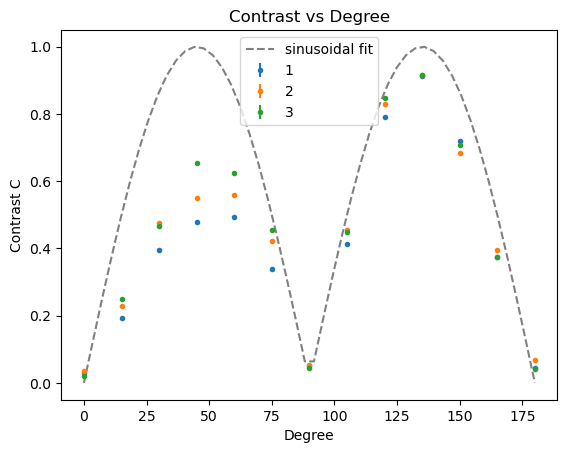

In [61]:
deg, Vmax1, Vmin1 = np.genfromtxt("data/contrast1.txt", unpack=True)
Vmax2, Vmin2 = np.genfromtxt("data/contrast2.txt", usecols=(1,2),unpack=True)
Vmax3, Vmin3 = np.genfromtxt("data/contrast3.txt", usecols=(1,2),unpack=True)

Vmax1_err = np.ones(len(Vmax1))*0.1*Vmax1
Vmin1_err = np.ones(len(Vmin1))*0.1*Vmin1
Vmax2_err = np.ones(len(Vmax2))*0.1*Vmax2
Vmin2_err = np.ones(len(Vmin2))*0.1*Vmin2
Vmax3_err = np.ones(len(Vmax3))*0.1*Vmax3
Vmin3_err = np.ones(len(Vmin3))*0.1*Vmin3

V_max1 = [ufloat(val, err) for val, err in zip(Vmax1, Vmax1_err)]
V_min1 = [ufloat(val, err) for val, err in zip(Vmin1, Vmin1_err)]
V_max2 = [ufloat(val, err) for val, err in zip(Vmax2, Vmax2_err)]
V_min2 = [ufloat(val, err) for val, err in zip(Vmin2, Vmin2_err)]
V_max3 = [ufloat(val, err) for val, err in zip(Vmax3, Vmax3_err)]
V_min3 = [ufloat(val, err) for val, err in zip(Vmin3, Vmin3_err)]

C1 = np.abs((Vmax1 - Vmin1) / (Vmax1 + Vmin1))
C2 = np.abs((Vmax2 - Vmin2) / (Vmax2 + Vmin2))
C3 = np.abs((Vmax3 - Vmin3) / (Vmax3 + Vmin3))


plt.errorbar(deg, unp.nominal_values(C1), yerr=unp.std_devs(C1), fmt=".", label="1")
plt.errorbar(deg, unp.nominal_values(C2), yerr=unp.std_devs(C1), fmt=".", label="2")
plt.errorbar(deg, unp.nominal_values(C3), yerr=unp.std_devs(C1), fmt=".", label="3")
plt.plot(np.linspace(0,180), np.abs(np.sin(2*np.radians(np.linspace(0,180)))), color="gray", linestyle="dashed", label="sinusoidal fit")
plt.xlabel("Degree")
plt.ylabel("Contrast C")
plt.title("Contrast vs Degree")
plt.legend()


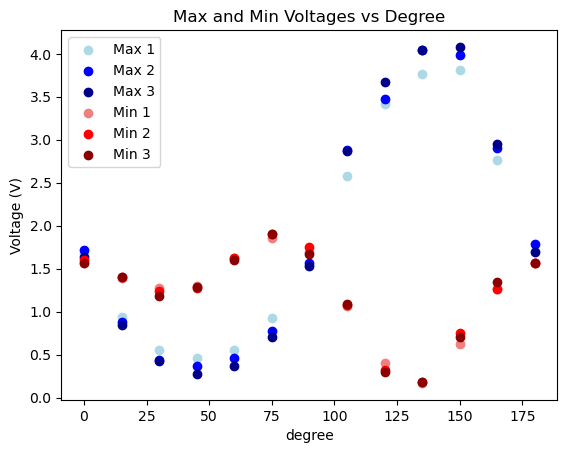

In [ ]:
plt.scatter(deg, Vmax1, color="lightblue", label="Max 1")
plt.scatter(deg, Vmax2, color="blue", label="Max 2")
plt.scatter(deg, Vmax3, color="darkblue", label="Max 3")

plt.scatter(deg, Vmin1, color="lightcoral", label="Min 1")
plt.scatter(deg, Vmin2, color="red", label="Min 2")
plt.scatter(deg, Vmin3, color="darkred", label="Min 3")

plt.xlabel("degree")
plt.ylabel("Voltage (V)")
plt.title("Max and Min Voltages vs Degree")
plt.legend()

In [ ]:
print(np.mean(Vmax3))

1.9300000000000002


In [ ]:
counts = np.genfromtxt("data/glass.txt", unpack=True)
meancount = np.mean(counts)
mean_dev = np.std(counts)/np.sqrt(len(counts))

print(f"Mean counts: {meancount} ± {mean_dev}")

lambda0 = 632.99e-9
d = 1e-3
theta = np.radians(10)
theta0 = np.radians(10)
M = meancount
n_glass = 1 / (1 - (M * lambda0) / (1 * d * (theta**2+theta0**2)))
print(f"Refractive index of glass: {n_glass}")

Mean counts: 31.083333333333332 ± 0.8453987663074002
Refractive index of glass: 1.4770029529039566


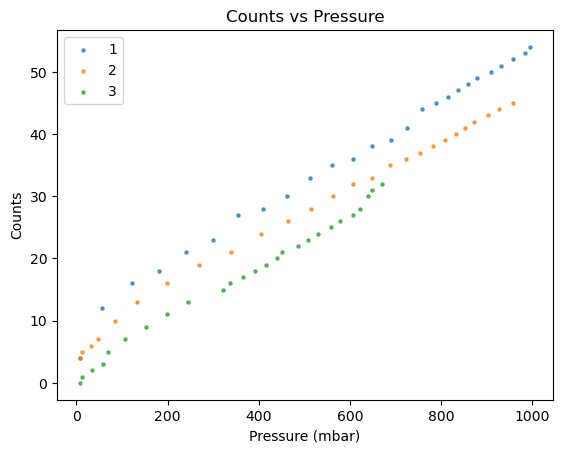

In [ ]:
p1, c1 = np.genfromtxt("data/air1.txt", unpack=True)
p2, c2 = np.genfromtxt("data/air2.txt", unpack=True)
p3, c3 = np.genfromtxt("data/air3.txt", unpack=True)

plt.scatter(p1, c1, alpha=0.7, s=5,label="1")
plt.scatter(p2, c2, alpha=0.7, s=5,label="2")
plt.scatter(p3, c3, alpha=0.7, s=5,label="3")
plt.xlabel("Pressure (mbar)")
plt.ylabel("Counts")
plt.title("Counts vs Pressure")
plt.legend()

In [ ]:
arr = np.random.normal(0, 2, 1000000)
from scipy.stats import sem

print(sem(arr))
print(np.std(arr, ddof=1))

0.0020011985321485228
2.0011985321485226


In [ ]:
file1 = np.genfromtxt("data/contrast1.txt", comments="#")
file2 = np.genfromtxt("data/contrast2.txt", comments="#")
file3 = np.genfromtxt("data/contrast3.txt", comments="#")

angles = file1[:, 0]
Imax_all = np.vstack([file1[:, 1], file2[:, 1], file3[:, 1]])
Imin_all = np.vstack([file1[:, 2], file2[:, 2], file3[:, 2]])

print(Imax_all)
Imax_std = sem(Imax_all, axis=0)
print(Imax_std)

[[1.67 0.94 0.55 0.46 0.55 0.92 1.53 2.58 3.42 3.76 3.81 2.76 1.7 ]
 [1.72 0.88 0.44 0.37 0.46 0.77 1.57 2.88 3.47 4.04 3.99 2.9  1.79]
 [1.63 0.84 0.43 0.27 0.37 0.71 1.53 2.87 3.67 4.05 4.08 2.95 1.69]]
[0.02603417 0.02905933 0.03844188 0.05487359 0.05196152 0.06244998
 0.01333333 0.0983757  0.07637626 0.09504385 0.07937254 0.05686241
 0.03179797]


In [25]:
# Gegebene Konstanten 

lambda_vac = 632.99e-9 
d = 1e-3 
theta0_deg = 10 
theta0 = np.deg2rad(theta0_deg) 

# Unsicherheiten
dM = 2 # Zählunsicherheit
dtheta_deg = 2 # Winkelunsicherheit 
dtheta = np.deg2rad(dtheta_deg)

theta = ufloat(theta0, dtheta)
# Tabelle der gemessenen Maxima

M_values = np.array([29, 36, 32, 25, 32, 34, 27, 32, 32, 33, 32, 29])
M_errs = 2*np.ones(len(M_values))
M_u = unp.uarray(M_values, M_errs)

# Formel für n(M)
def refractive_index(M, theta): return 1 / (1 - (lambda_vac * M) / (2 * d * theta0 * theta))



# n für jede Messung 

n_values = refractive_index(M_values, theta)


# Mittelwert und Standardabweichung

n_mean = np.mean(n_values) 


print("Einzelne n-Werte:")
print(n_values) 

print("\nMittelwert des Brechungsindex:")
print(f"n_mean = {n_mean:.4f}") 


Einzelne n-Werte:
[1.4312450367602714+/-0.12344346369812786
 1.5975386312543645+/-0.19091820941914076
 1.4980765625123769+/-0.14923136492730452
 1.3508912249059677+/-0.09480317532439564
 1.4980765625123769+/-0.14923136492730452
 1.546209739511053+/-0.16891096380955717
 1.3899077392361152+/-0.10838715687046678
 1.4980765625123769+/-0.14923136492730452
 1.4980765625123769+/-0.14923136492730452
 1.521762634447546+/-0.15879977623063793
 1.4980765625123769+/-0.14923136492730452
 1.4312450367602714+/-0.12344346369812786]

Mittelwert des Brechungsindex:
n_mean = 1.4799+/-0.1429


In [ ]:
M_values = np.array([29, 36, 32, 25, 32, 34, 27, 32, 32, 33, 32, 29])
M_errs = 2*np.ones(len(M_values))
print(M_values)
print(M_errs)

[29 36 32 25 32 34 27 32 32 33 32 29]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [27]:
file1 = np.genfromtxt("data/air1.txt")
file2 = np.genfromtxt("data/air2.txt")
file3 = np.genfromtxt("data/air3.txt")

# Jede Datei: p[mbar], counts
p1, M1 = file1[:,0], file1[:,1]
p2, M2 = file2[:,0], file2[:,1]
p3, M3 = file3[:,0], file3[:,1]


# 3. Mittelwerte bilden

p_mbar = p1   #
p = p_mbar * 100   

M_mean = (M1 + M2 + M3) / 3.0

print(M1, M2, M3)

[ 4. 12. 16. 18. 21. 23. 27. 28. 30. 33. 35. 36. 38. 39. 41. 44. 45. 46.
 47. 48. 49. 50. 51. 52. 53. 54.] [ 4.  5.  6.  7. 10. 13. 16. 19. 21. 24. 26. 28. 30. 32. 33. 35. 36. 37.
 38. 39. 40. 41. 42. 43. 44. 45.] [ 0.  1.  2.  3.  5.  7.  9. 11. 13. 15. 16. 17. 18. 19. 20. 21. 22. 23.
 24. 25. 26. 27. 28. 30. 31. 32.]


fit m*x+b für delta n in p in mbar:
m = (2.859+/-0.078)e-09
b = (2.605+/-0.490)e-05
A = (4.68+/-0.13)e-06
1.000323+/-0.000009


Text(0, 0.5, 'delta n')

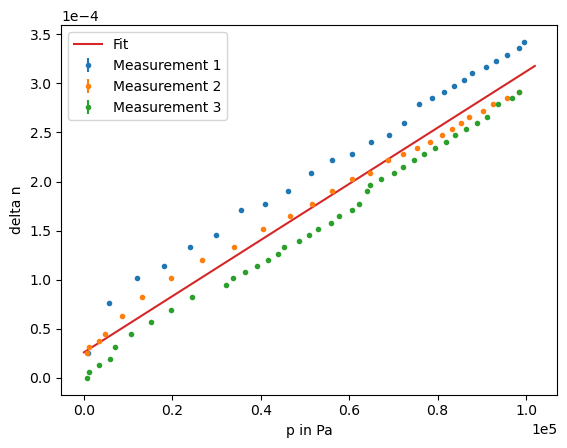

In [59]:
Lambda_vac = 632.996e-9 
L = 100.0e-3                   
dL = 0.1e-3
L_u = ufloat(L, dL)

def linfit(x, m, b):
    return m*x+b

def delta_n_func(M):
    return M*Lambda_vac/L_u 

p1, M1 = np.genfromtxt("data/air1.txt", unpack=True)
p2, M2 = np.genfromtxt("data/air2.txt", unpack=True)
p3, M3 = np.genfromtxt("data/air3.txt", unpack=True)

p1 *= 100
p2 *= 100
p3 *= 100

delta_n1 = delta_n_func(M1)
delta_n2 = delta_n_func(M2)
delta_n3 = delta_n_func(M3)

p = np.concatenate((p1, p2, p3))
delta_n = np.concatenate((delta_n1, delta_n2, delta_n3))

params, cov = curve_fit(linfit, p, unp.nominal_values(delta_n))
m = ufloat(params[0], np.sqrt(np.diag(cov))[0])
b = ufloat(params[1], np.sqrt(np.diag(cov))[1])

print("fit m*x+b für delta n in p in mbar:")
print(f"m = {m:.4}")
print(f"b = {b:.4}")

T = 22.0 + 273 # K
R = 8.3144 # J/molK
A = m*2*R*T/3
print(f"A = {A}")

n_standard = A * 3/2/R * (101300)/(15+273) + b + 1
print(n_standard)

plt.errorbar(p1, unp.nominal_values(delta_n1), yerr=unp.std_devs(delta_n1), fmt=".", label="Measurement 1")
plt.errorbar(p2, unp.nominal_values(delta_n2), yerr=unp.std_devs(delta_n2), fmt=".", label="Measurement 2")
plt.errorbar(p3, unp.nominal_values(delta_n3), yerr=unp.std_devs(delta_n3), fmt=".", label="Measurement 3")

xx = np.linspace(0, 102000)
plt.plot(xx, linfit(xx, *params), label="Fit")

plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))
plt.legend()
plt.xlabel("p in Pa")
plt.ylabel("delta n")